In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv


In [3]:
# Importar biblioteca

import numpy as np  # Arrays e cálculos numéricos
import pandas as pd  # Manipulação de tabelas e DataFrames
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos estatísticos aprimorados
from sklearn.model_selection import train_test_split  # Separação de dados
from sklearn.preprocessing import StandardScaler  # Normalização de dados
from sklearn.ensemble import RandomForestClassifier  # Algoritmo de ML

In [34]:
# Leitura do dataset
df = pd.read_csv("/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv")
df.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


**Análise Exploratória dos Dados**

In [5]:
# Estatística descritivas
df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


In [6]:
# Informações Gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [7]:
# Verificação de dados nulos
df.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [8]:
# Verificação de valores duplicados
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [9]:
# Substituir valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
# Remover linhas com NaN
df.dropna(inplace=True)

# Ou preencher com a média da coluna
df.fillna(df.mean(), inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


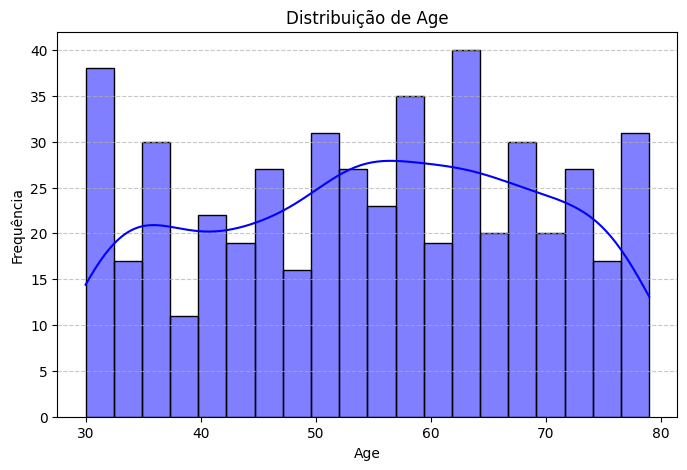

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


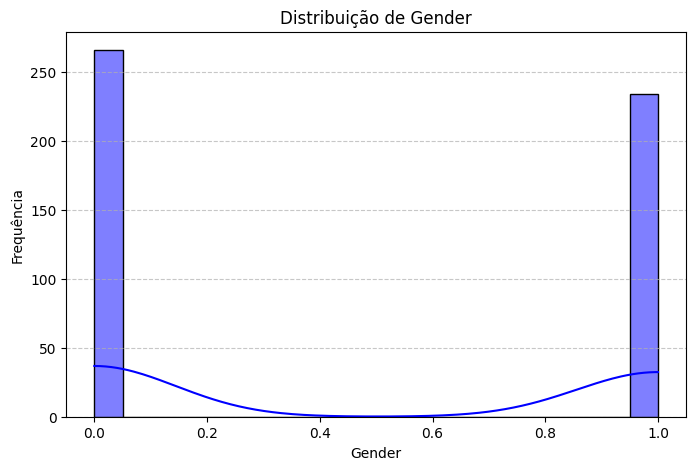

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


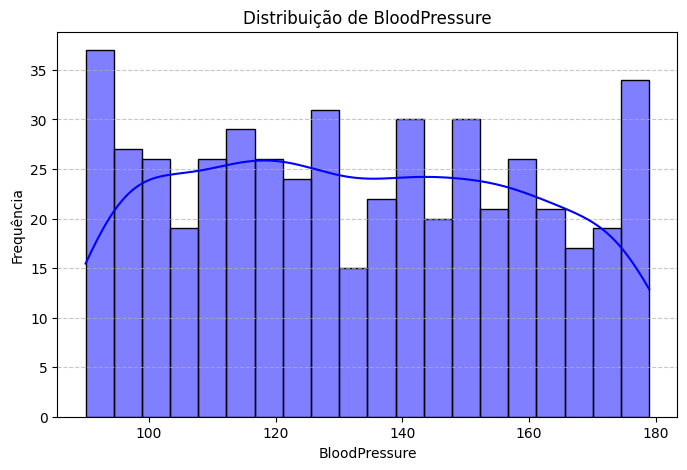

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


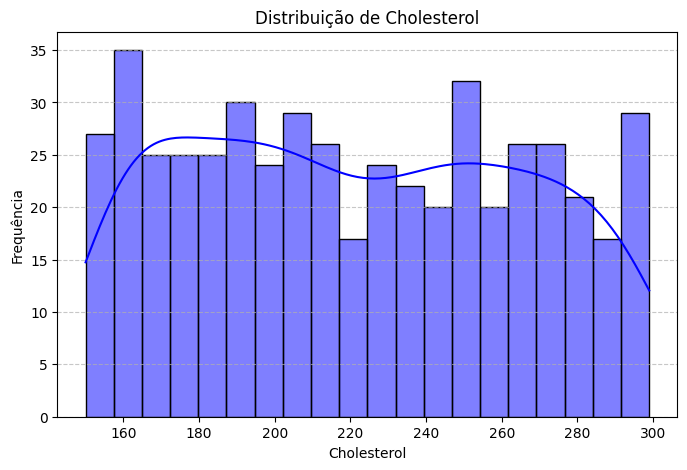

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


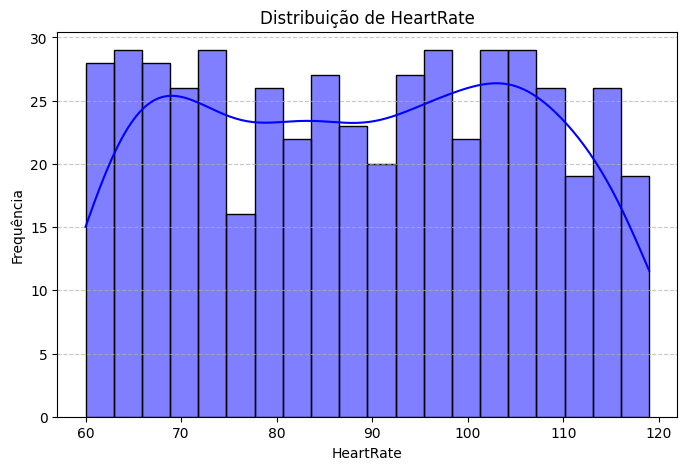

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


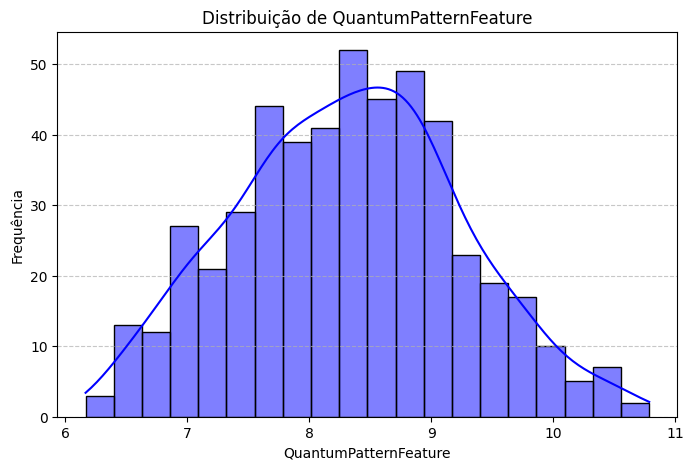

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


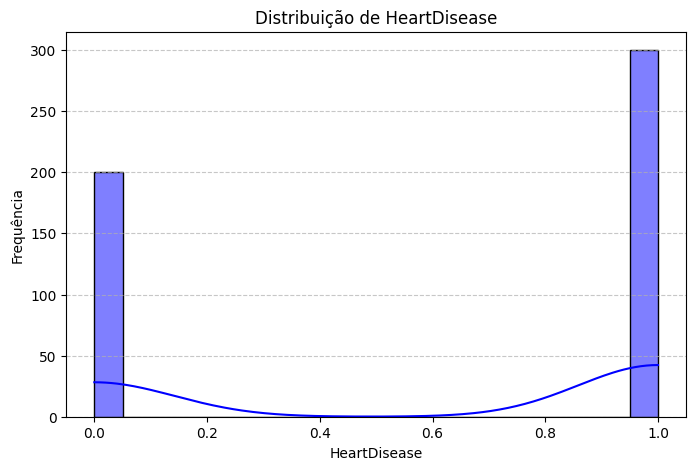

In [11]:
# Verificar os dados através de gráfico

# Selecionar apenas colunas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Criar histogramas separados para cada coluna numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 5))  # Criar uma nova figura para cada gráfico
    sns.histplot(df[col], bins=20, kde=True, color='blue')  # Criar histograma

    # Personalizar o gráfico
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Exibir o gráfico
    plt.show()

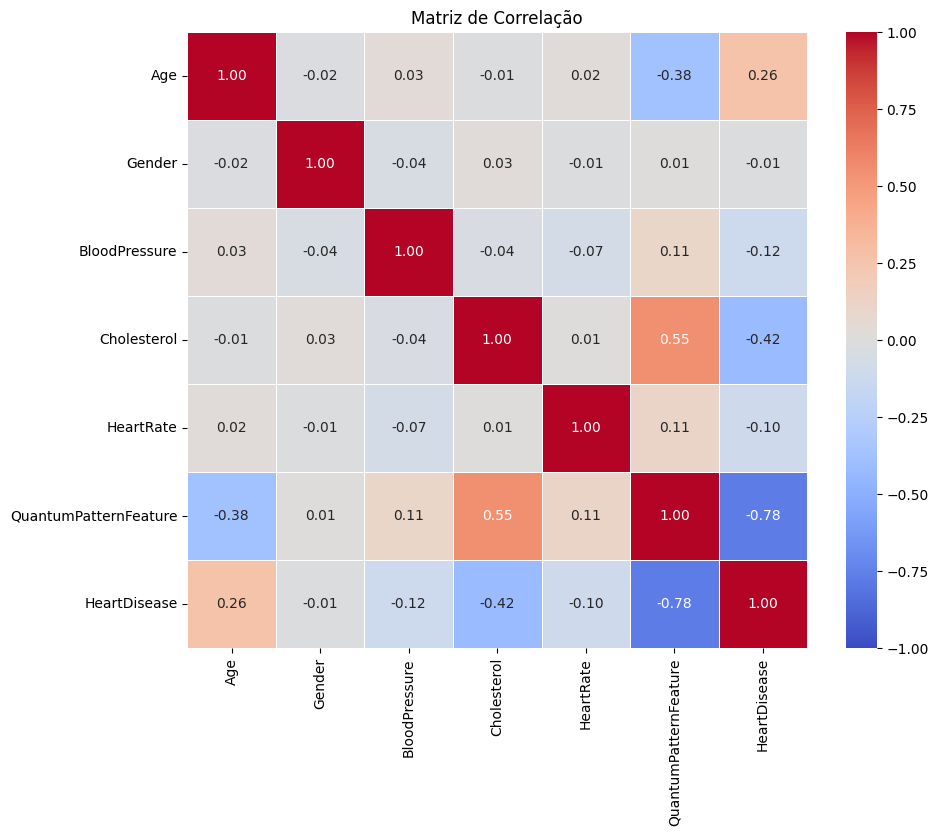

In [12]:
# Selecionar apenas as colunas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
corr_matrix = numerical_columns.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)

# Personalizar o gráfico
plt.title("Matriz de Correlação")
plt.show()

In [13]:
# Normalizar os dados

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Aplicar Min-Max Scaling (normalização entre 0 e 1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# Aplicar Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

# Mostrar amostra dos dados normalizados
print("🔹 Dataset Normalizado (Min-Max Scaling):")
print(df_minmax.head())

print("\n🔹 Dataset Normalizado (Z-score):")
print(df_standard.head())

🔹 Dataset Normalizado (Min-Max Scaling):
        Age  Gender  BloodPressure  Cholesterol  HeartRate  \
0  0.775510     1.0       0.168539     0.275168   0.796610   
1  0.571429     0.0       0.078652     0.664430   0.491525   
2  0.285714     0.0       0.033708     0.268456   0.372881   
3  0.857143     1.0       0.033708     0.221477   0.694915   
4  0.142857     0.0       0.617978     0.107383   0.728814   

   QuantumPatternFeature  HeartDisease  
0               0.475640           1.0  
1               0.667571           0.0  
2               0.384800           1.0  
3               0.071526           1.0  
4               0.322326           1.0  

🔹 Dataset Normalizado (Z-score):
        Age    Gender  BloodPressure  Cholesterol  HeartRate  \
0  0.918558  1.066186      -1.056150    -0.696033   1.047939   
1  0.219290 -0.937923      -1.359271     0.627571   0.013448   
2 -0.759684 -0.937923      -1.510832    -0.718854  -0.388854   
3  1.198265  1.066186      -1.510832    -0.878599 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


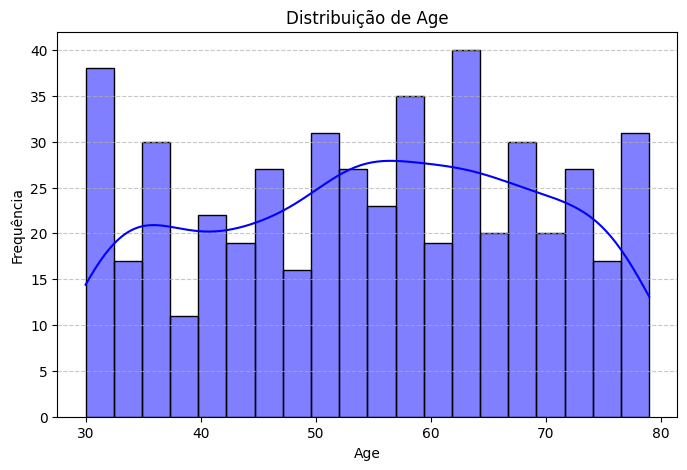

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


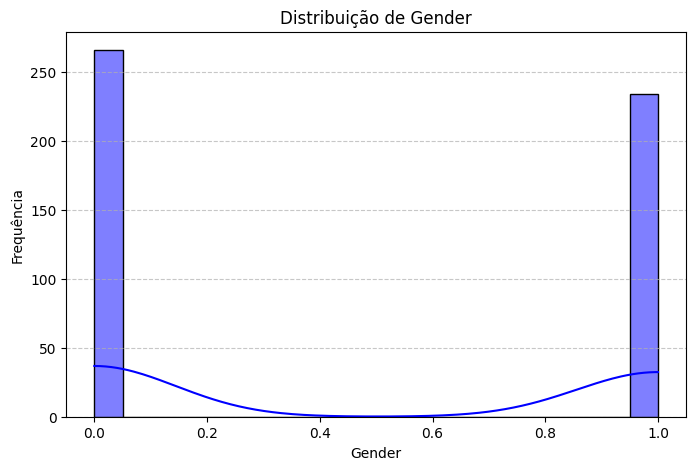

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


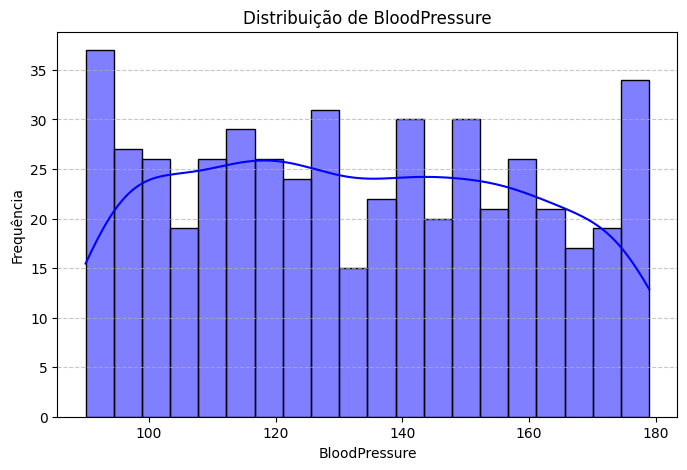

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


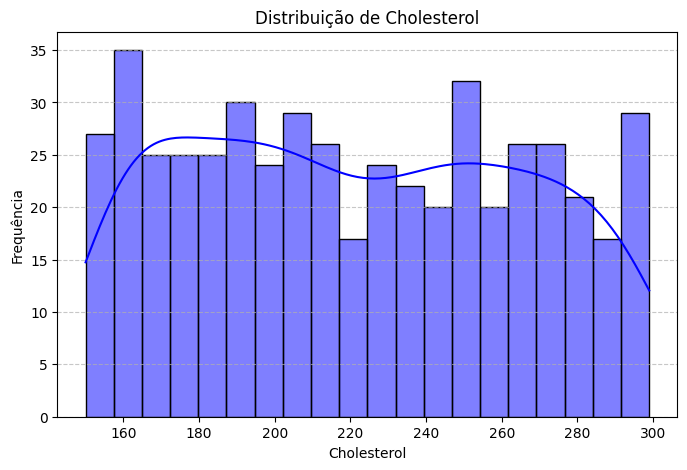

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


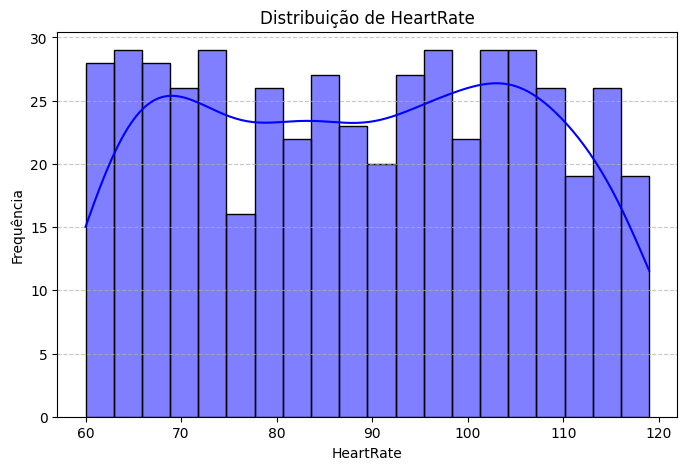

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


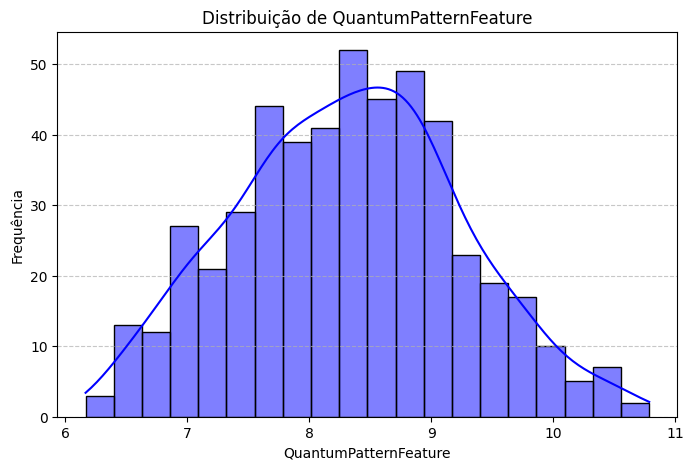

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


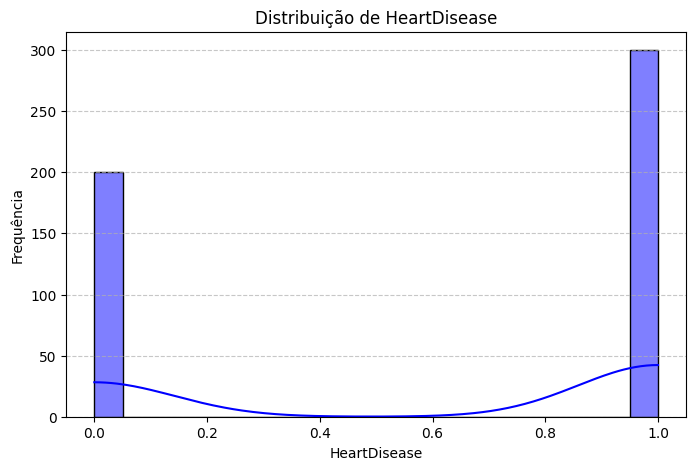

In [14]:
# Verificar os dados através de gráfico

# Selecionar apenas colunas numéricas
numerical_columns = df_minmax.select_dtypes(include=['int64', 'float64']).columns

# Criar histogramas separados para cada coluna numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 5))  # Criar uma nova figura para cada gráfico
    sns.histplot(df[col], bins=20, kde=True, color='blue')  # Criar histograma

    # Personalizar o gráfico
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Exibir o gráfico
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


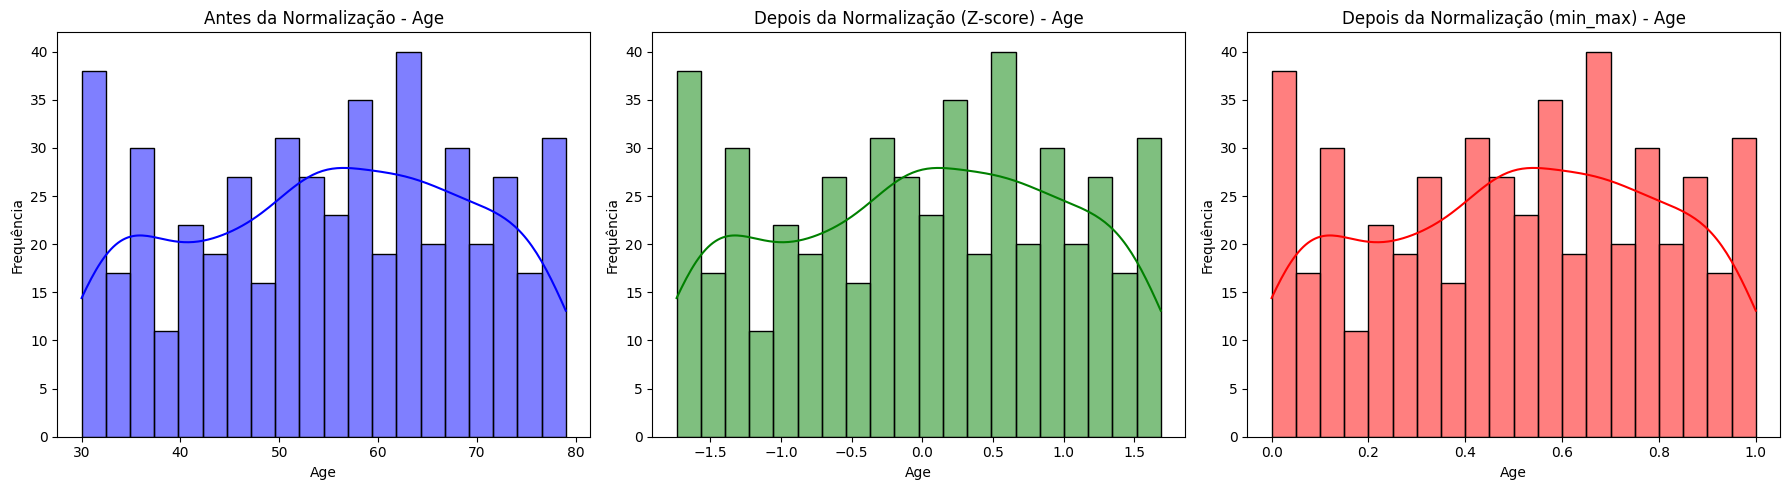

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


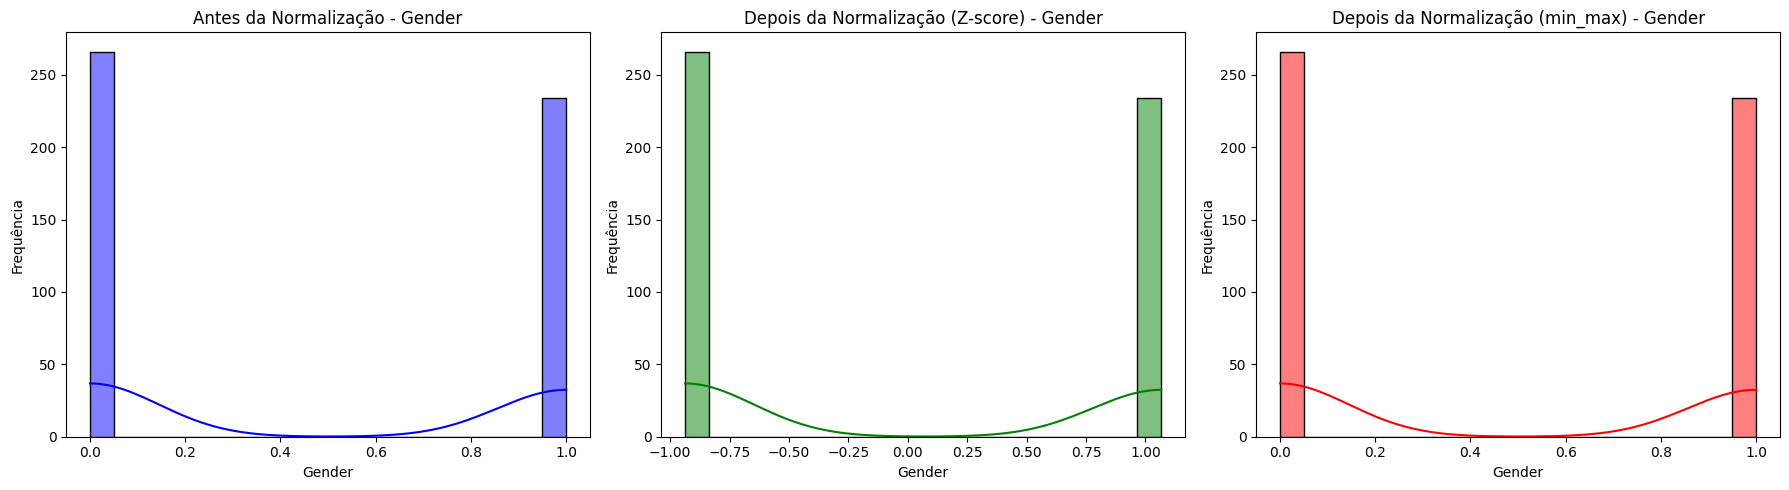

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


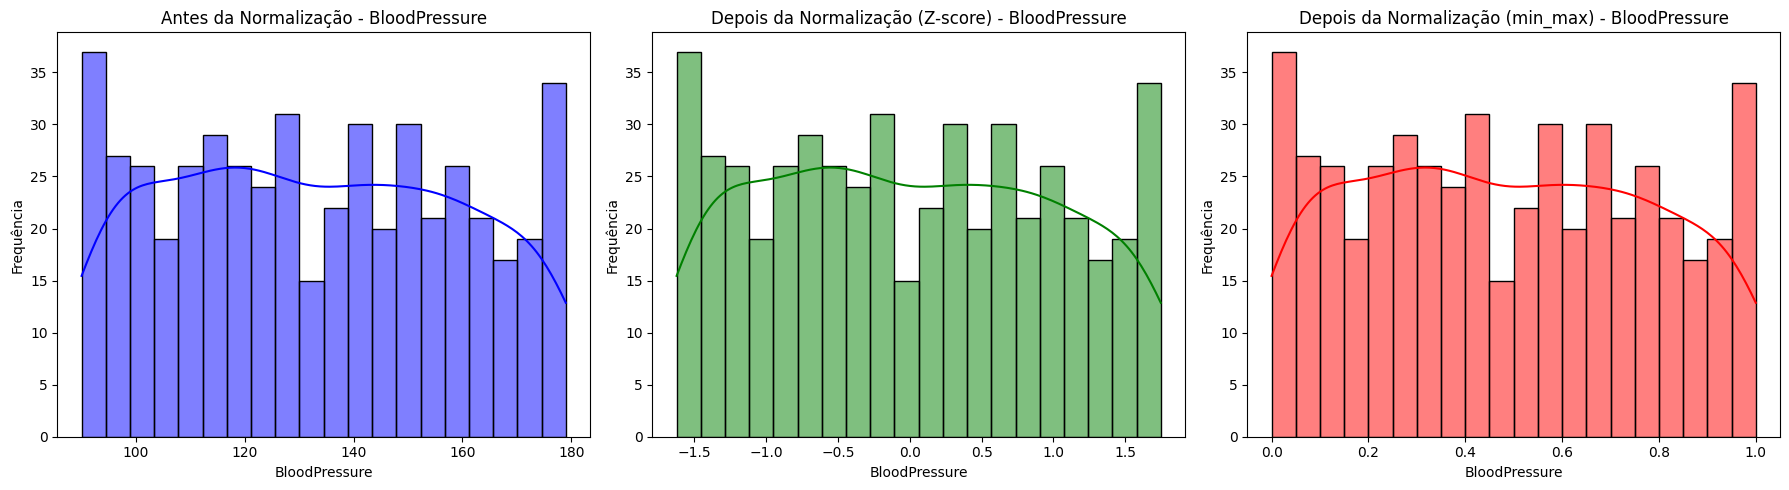

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


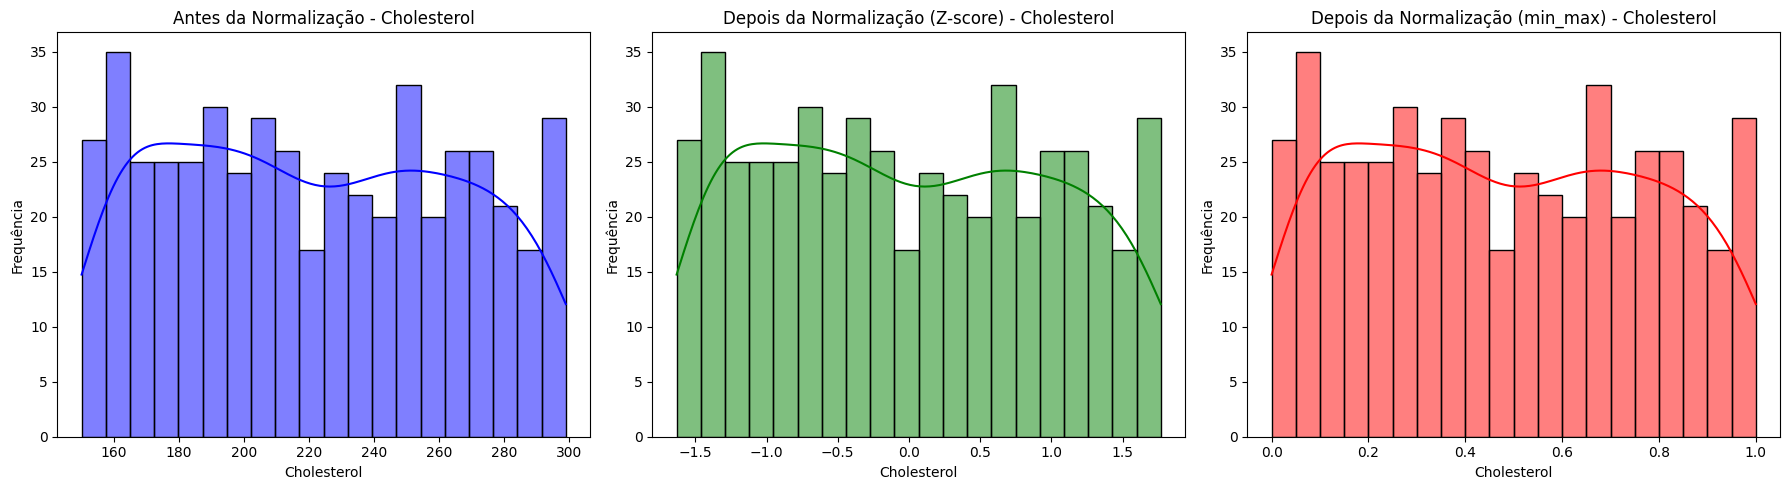

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


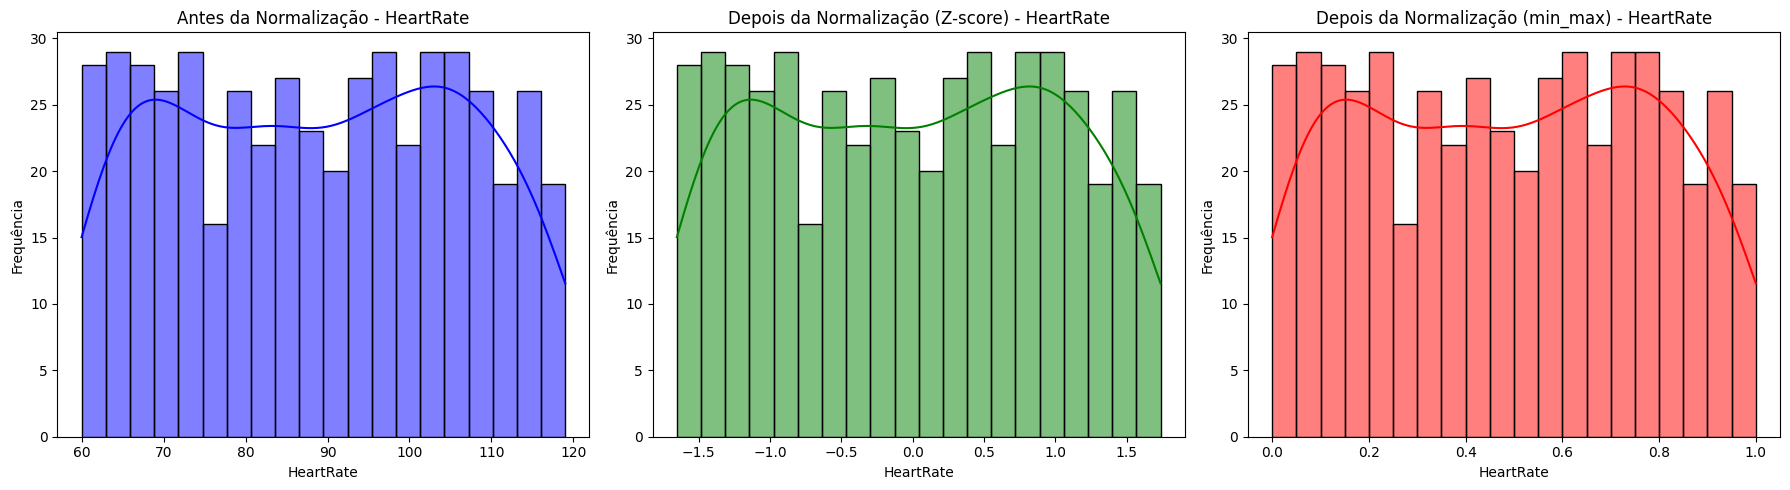

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


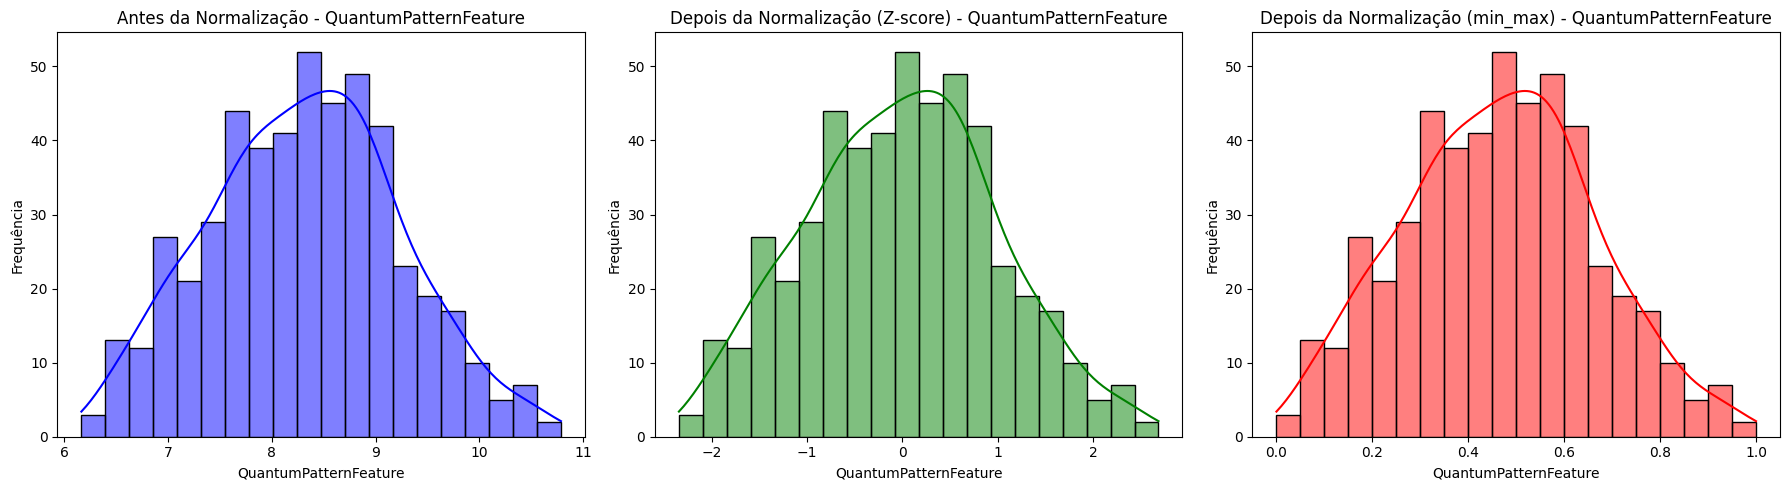

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


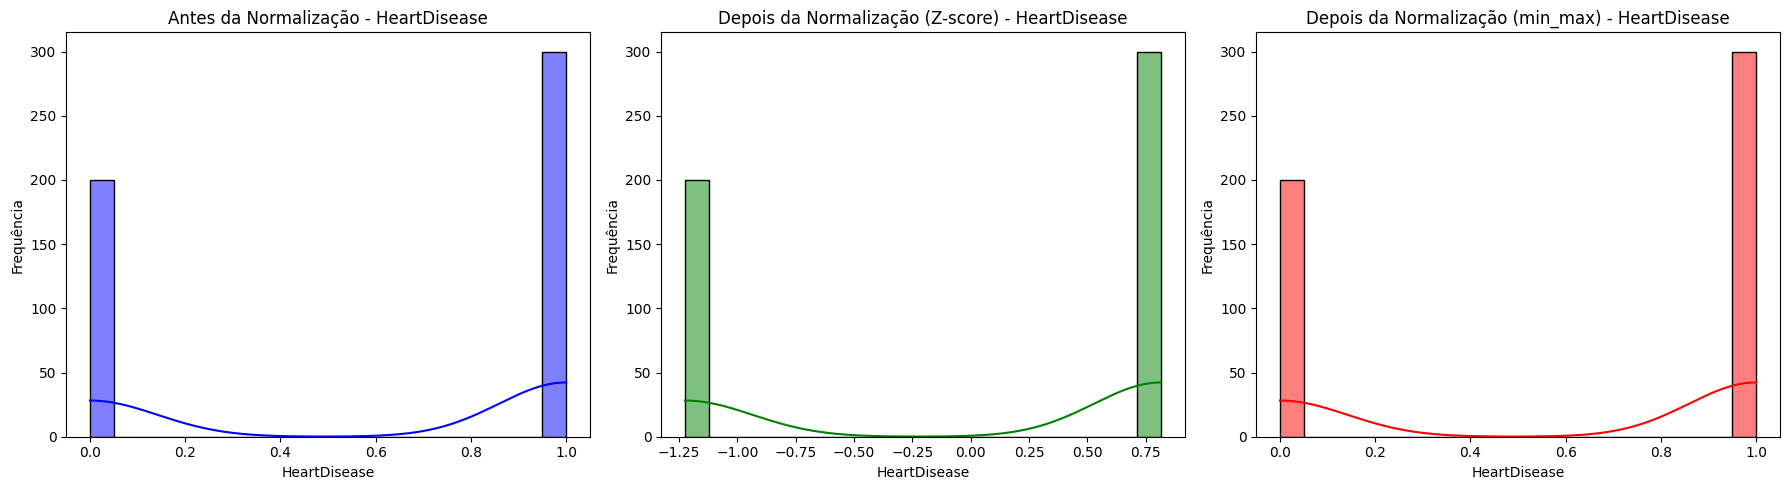

In [15]:
# Selecionar colunas numéricas
numerical_columns = df_standard.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(18, 5))  # Tamanho do gráfico
    
    # Antes da normalização
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f"Antes da Normalização - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    
    # Depois da normalização(z-score)
    plt.subplot(1, 3, 2)
    sns.histplot(df_standard[col], bins=20, kde=True, color='green')
    plt.title(f"Depois da Normalização (Z-score) - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")

     # Depois da normalização (minmax)
    plt.subplot(1, 3, 3)
    sns.histplot(df_minmax[col], bins=20, kde=True, color='red')
    plt.title(f"Depois da Normalização (min_max) - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    
    plt.tight_layout()  # Ajustar layout para não sobrepor gráficos
    plt.show()

In [16]:
# Feature Engineering

X=df.drop(["HeartDisease"],axis=1)
y=df["HeartDisease"]

**Arvore de decisão (Decision Tree Classifier)**

In [17]:
# DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

Acurácia do modelo: 0.91


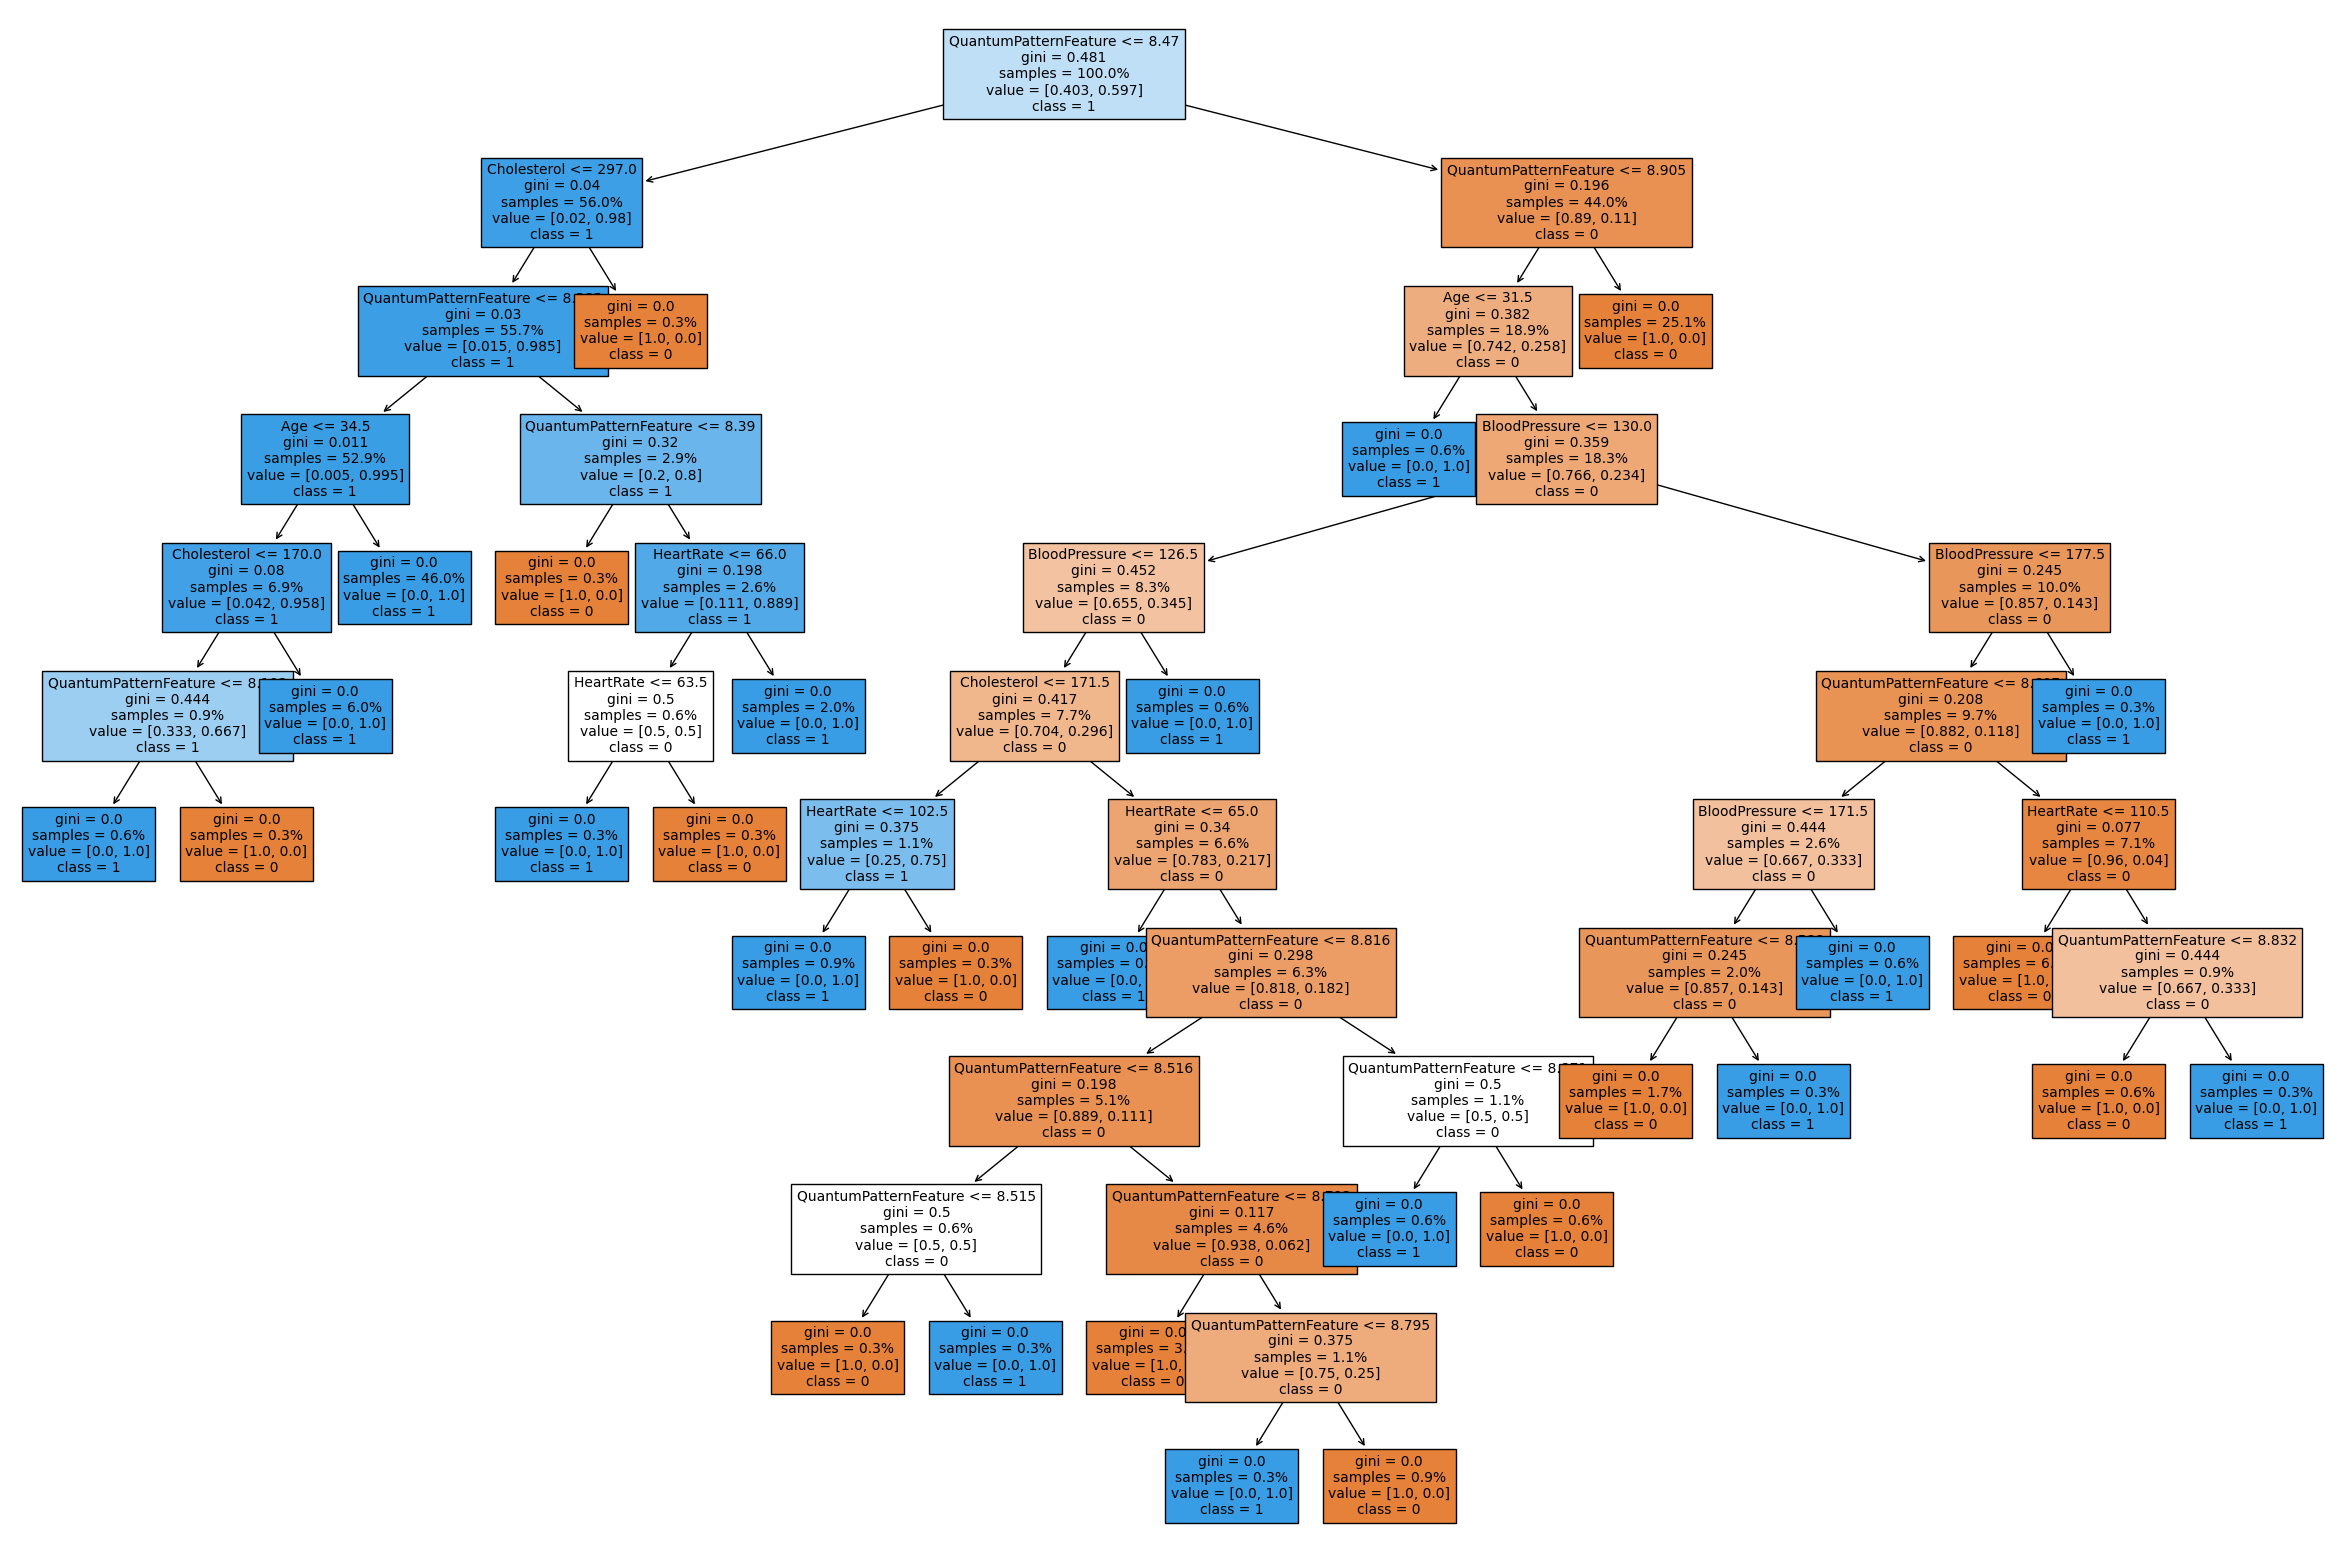

In [21]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_clf = clf.predict(X_test)

# Avaliando a acurácia
accuracy = accuracy_score(y_test, y_pred_clf)
print(f'Acurácia do modelo: {accuracy:.2f}')


# Visualizando a árvore de decisão com ajustes de legibilidade
plt.figure(figsize=(30, 20))  # Aumentar o tamanho da imagem
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_],
          fontsize=10, proportion=True)  # Ajustar o tamanho da fonte e proporção
plt.show()

Verificar os features mais relevantes

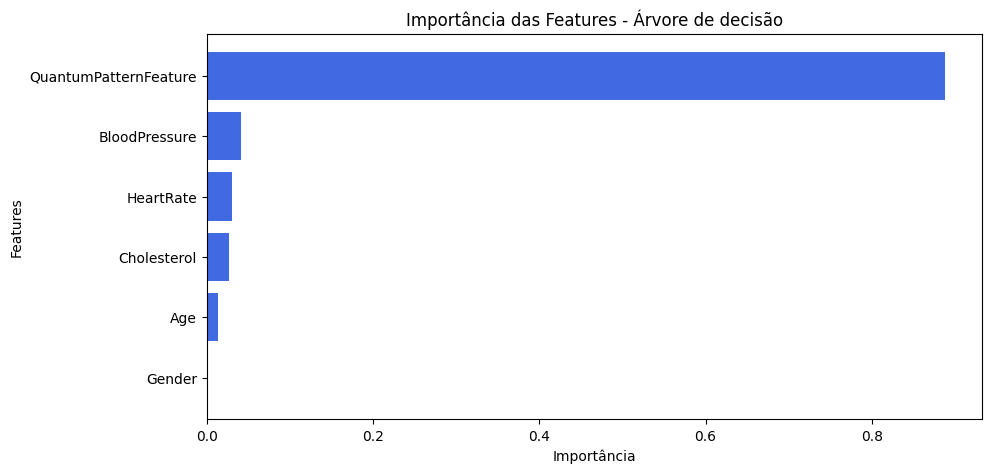

In [22]:
# Obter importância das features
feature_importances = clf.feature_importances_
features = X_train.columns

# Criar DataFrame
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plotar
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Features - Árvore de decisão")
plt.gca().invert_yaxis()
plt.show()

**Matrix de Confusão**

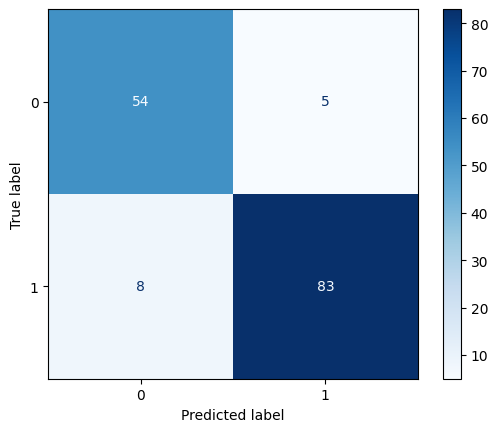

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_clf)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in clf.classes_])
disp.plot(cmap='Blues')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score

# Validação cruzada
cv_scores = cross_val_score(clf, X, y, cv=5)  # cv=5 significa 5-fold cross-validation

# Exibindo os resultados da validação cruzada
print(f"Scores de validação cruzada: {cv_scores}")
print(f"Media da acurácia: {cv_scores.mean():.2f}")

Scores de validação cruzada: [0.86 0.93 0.89 0.9  0.88]
Media da acurácia: 0.89


**Random forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Criar modelo com pesos ajustados
model_RFC = RandomForestClassifier(class_weight='balanced', random_state=42)

# Treinar o modelo
model_RFC.fit(X_train, y_train)

# Verificar a performance no conjunto de validação
print(f"Accuracy no conjunto de validação: {model_RFC.score(X_test, y_test)}")

Accuracy no conjunto de validação: 0.9


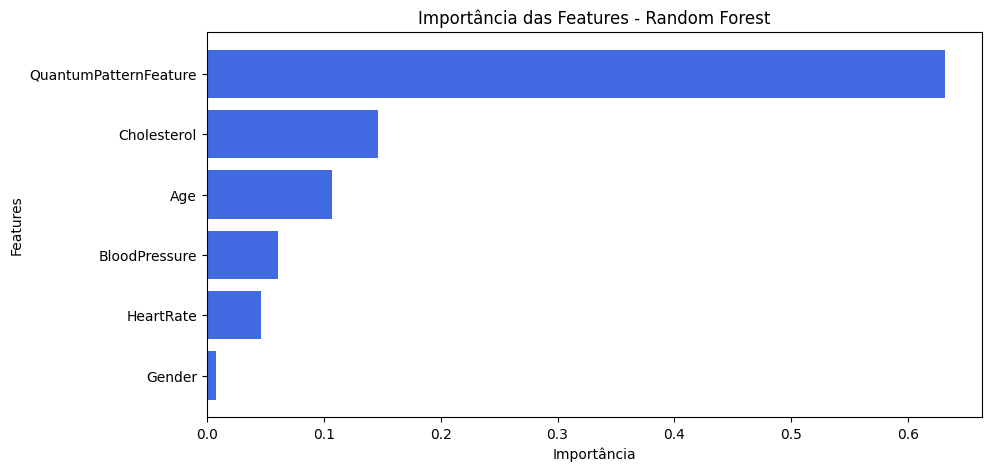

In [28]:
# Obter importância das features
feature_importances = model_RFC.feature_importances_
features = X_train.columns

# Criar DataFrame
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plotar
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()

Acurácia: 0.9
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        59
           1       0.95      0.88      0.91        91

    accuracy                           0.90       150
   macro avg       0.89      0.91      0.90       150
weighted avg       0.91      0.90      0.90       150



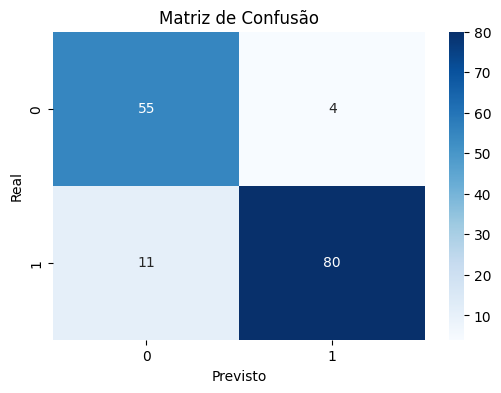

In [29]:
from sklearn.metrics import accuracy_score, classification_report
# Fazendo previsões
y_pred = model_RFC.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gerando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=model_RFC.classes_,
            yticklabels=model_RFC.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

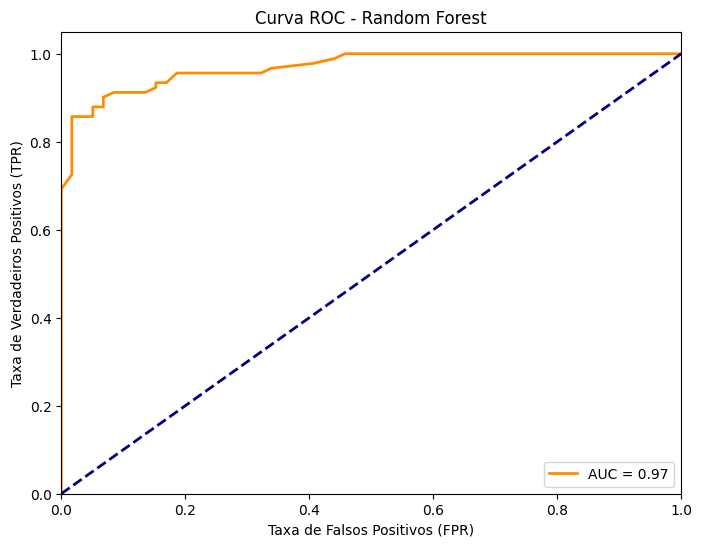

AUC-ROC: 0.9695


In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 🔹 Obter probabilidades da classe positiva
y_prob = model_RFC.predict_proba(X_test)[:, 1]  # Pegamos a probabilidade da classe 1

# 🔹 Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 🔹 Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

# 🔹 Exibir a AUC
print(f"AUC-ROC: {roc_auc:.4f}")

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Criar o modelo Random Forest
model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar validação cruzada com 5 folds
cv_scores = cross_val_score(model_RFC, X_train, y_train, cv=5, scoring='accuracy')

# Exibir os resultados
print(f"Scores por fold: {cv_scores}")
print(f"Média da Acurácia: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: {cv_scores.std():.4f}")

Scores por fold: [0.94285714 0.94285714 0.91428571 0.91428571 0.92857143]
Média da Acurácia: 0.9286
Desvio Padrão: 0.0128


# **Excluir os dados de "QuantumPatternFeature" e ver o que acontece com a precisão do modelo**

In [35]:
# Deletando a coluna 'QuantumPatternFeature'
df_novo = df.drop(columns=['QuantumPatternFeature'])
df_novo

,Age,Gender,BloodPressure,Cholesterol,HeartRate,HeartDisease
0,68,1,105,191,107,1
1,58,0,97,249,89,0
2,44,0,93,190,82,1
3,72,1,93,183,101,1
4,37,0,145,166,103,1
...,...,...,...,...,...,...
495,34,0,126,292,116,0
496,41,0,164,248,114,0
497,45,1,159,175,75,0
498,55,0,107,157,101,1


In [42]:
# Feature Engineering

X_novo = df_novo.drop(["HeartDisease"],axis=1)
y_novo = df_novo["HeartDisease"]

In [40]:
X_novo

,Age,Gender,BloodPressure,Cholesterol,HeartRate
0,68,1,105,191,107
1,58,0,97,249,89
2,44,0,93,190,82
3,72,1,93,183,101
4,37,0,145,166,103
...,...,...,...,...,...
495,34,0,126,292,116
496,41,0,164,248,114
497,45,1,159,175,75
498,55,0,107,157,101


Acurácia do modelo: 0.72


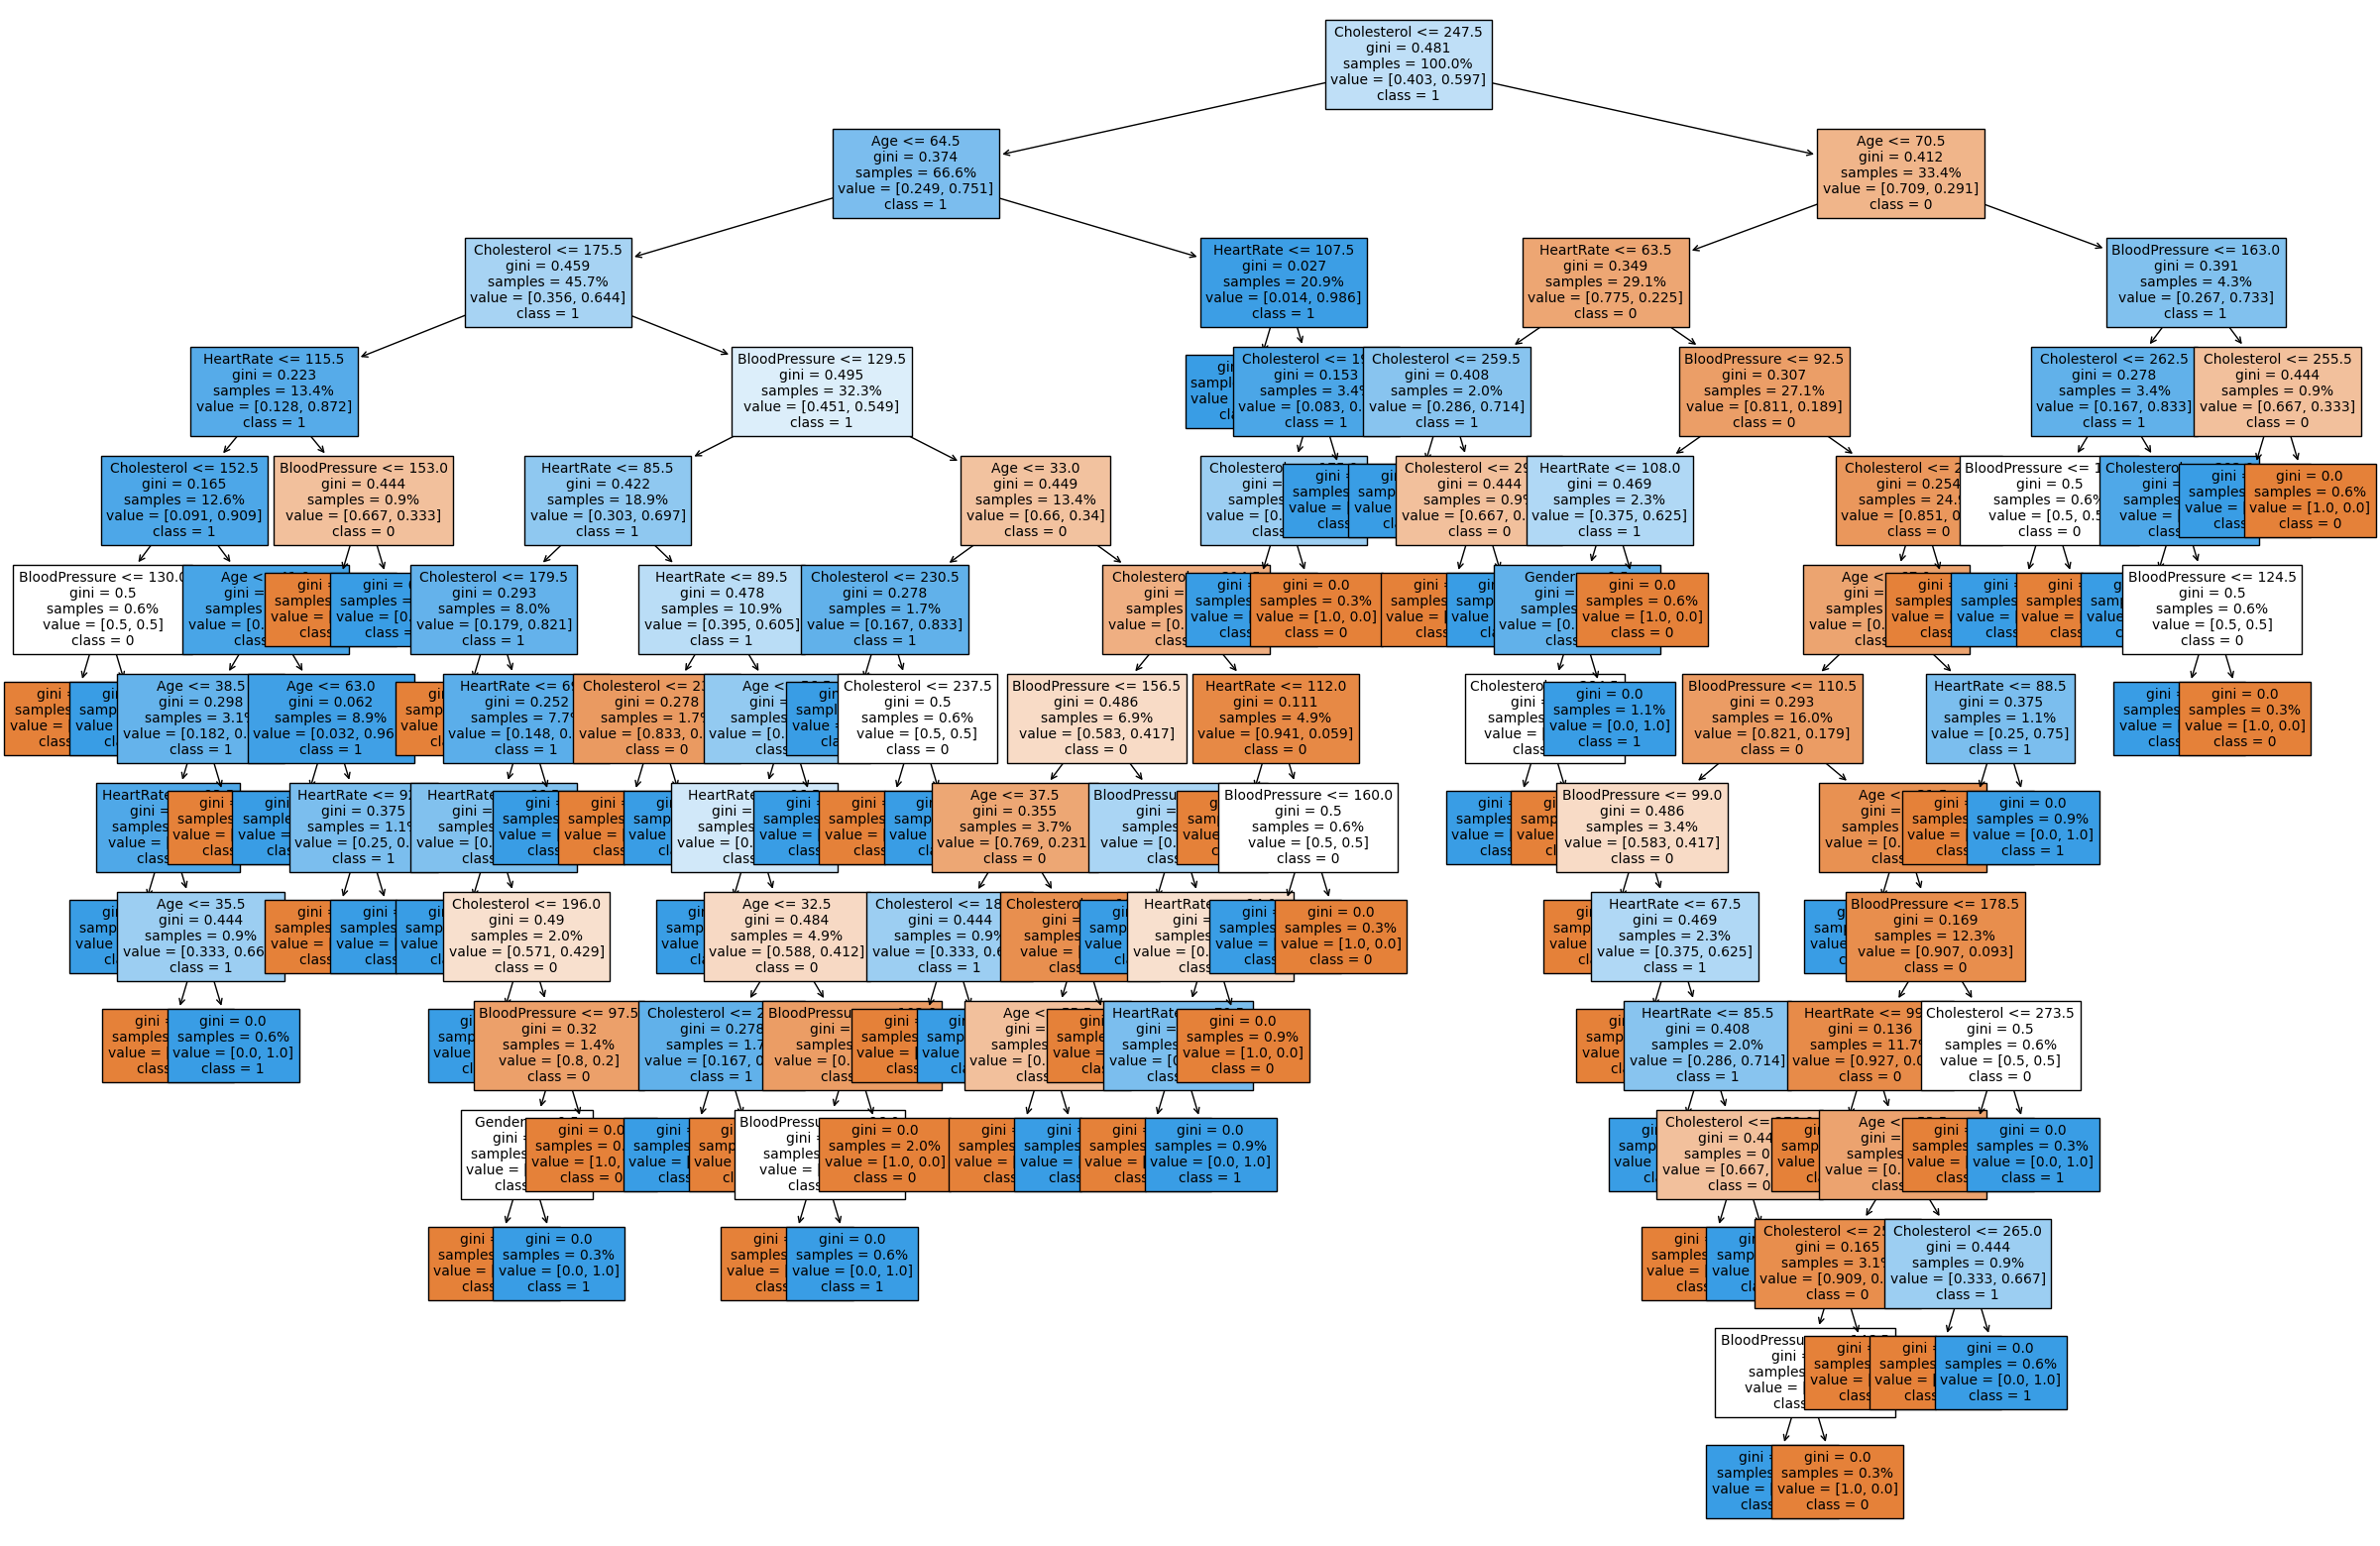

In [43]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_novo, y_novo, test_size=0.3, random_state=42)

# Criando o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_clf = clf.predict(X_test)

# Avaliando a acurácia
accuracy = accuracy_score(y_test, y_pred_clf)
print(f'Acurácia do modelo: {accuracy:.2f}')


# Visualizando a árvore de decisão com ajustes de legibilidade
plt.figure(figsize=(30, 20))  # Aumentar o tamanho da imagem
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_],
          fontsize=10, proportion=True)  # Ajustar o tamanho da fonte e proporção
plt.show()

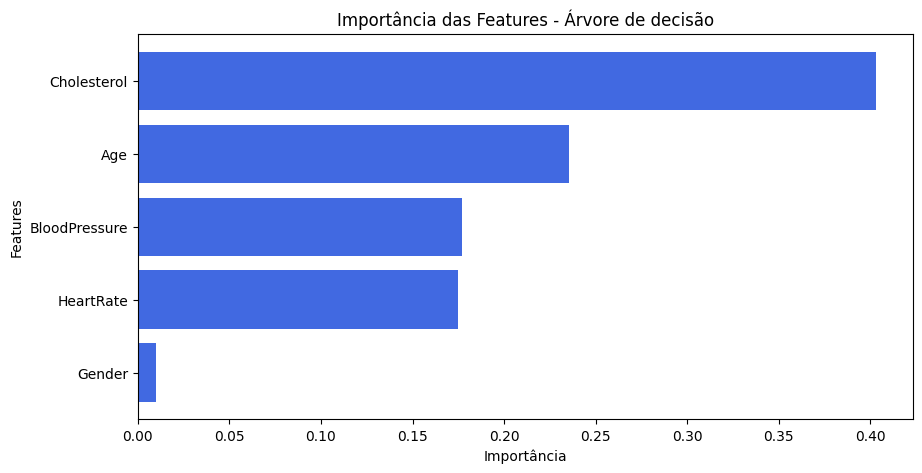

In [44]:
# Obter importância das features
feature_importances = clf.feature_importances_
features = X_train.columns

# Criar DataFrame
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plotar
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Features - Árvore de decisão")
plt.gca().invert_yaxis()
plt.show()

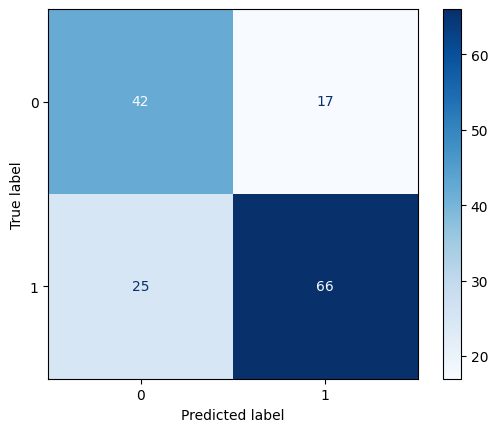

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_clf)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in clf.classes_])
disp.plot(cmap='Blues')
plt.show()

In [46]:
from sklearn.model_selection import cross_val_score

# Validação cruzada
cv_scores = cross_val_score(clf, X, y, cv=5)  # cv=5 significa 5-fold cross-validation

# Exibindo os resultados da validação cruzada
print(f"Scores de validação cruzada: {cv_scores}")
print(f"Media da acurácia: {cv_scores.mean():.2f}")

Scores de validação cruzada: [0.86 0.93 0.89 0.9  0.88]
Media da acurácia: 0.89


# **Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Criar modelo com pesos ajustados
model_RFC = RandomForestClassifier(class_weight='balanced', random_state=42)

# Treinar o modelo
model_RFC.fit(X_train, y_train)

# Verificar a performance no conjunto de validação
print(f"Accuracy no conjunto de validação: {model_RFC.score(X_test, y_test)}")

Accuracy no conjunto de validação: 0.7866666666666666


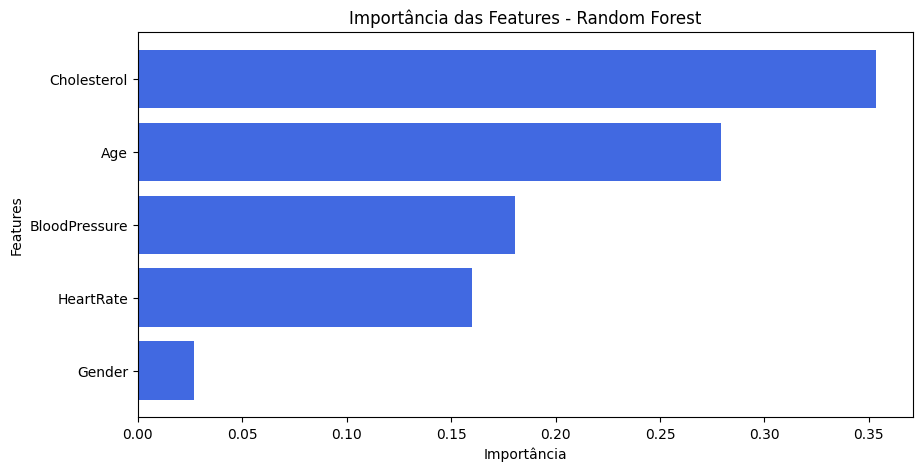

In [48]:
# Obter importância das features
feature_importances = model_RFC.feature_importances_
features = X_train.columns

# Criar DataFrame
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plotar
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()

Acurácia: 0.7866666666666666
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        59
           1       0.79      0.89      0.84        91

    accuracy                           0.79       150
   macro avg       0.79      0.76      0.77       150
weighted avg       0.79      0.79      0.78       150



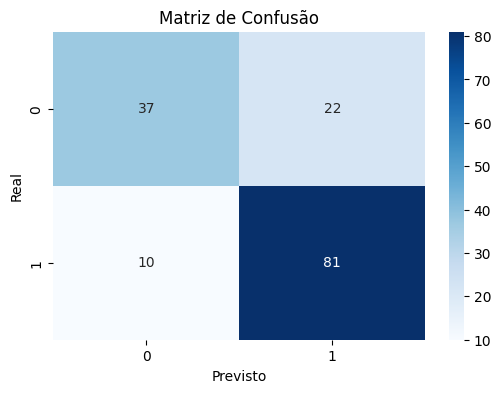

In [49]:
from sklearn.metrics import accuracy_score, classification_report
# Fazendo previsões
y_pred = model_RFC.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gerando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=model_RFC.classes_,
            yticklabels=model_RFC.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

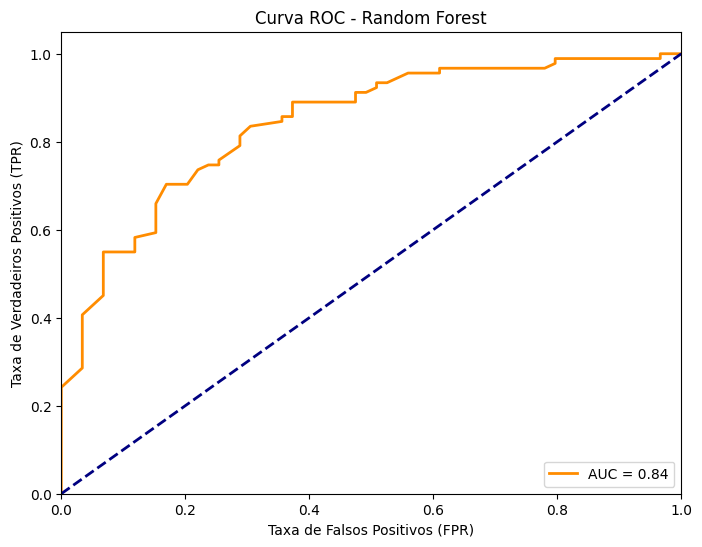

AUC-ROC: 0.8416


In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 🔹 Obter probabilidades da classe positiva
y_prob = model_RFC.predict_proba(X_test)[:, 1]  # Pegamos a probabilidade da classe 1

# 🔹 Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 🔹 Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

# 🔹 Exibir a AUC
print(f"AUC-ROC: {roc_auc:.4f}")

# ** Validação Cruzada**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Criar o modelo Random Forest
model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar validação cruzada com 5 folds
cv_scores = cross_val_score(model_RFC, X_train, y_train, cv=5, scoring='accuracy')

# Exibir os resultados
print(f"Scores por fold: {cv_scores}")
print(f"Média da Acurácia: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: {cv_scores.std():.4f}")

Scores por fold: [0.84285714 0.71428571 0.72857143 0.8        0.84285714]
Média da Acurácia: 0.7857
Desvio Padrão: 0.0550
